In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import mplhep as hep

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,
Comm: tls://192.168.235.106:8786,Workers: 0
Dashboard: /user/maria.jose@cern.ch/proxy/8787/status,Total threads: 0
Started: 8 minutes ago,Total memory: 0 B


In [3]:
samples = [
      "DYJetsToMuMu_M10to50",
     "DYJetsToMuMu_M50",

]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="backgrounds.yaml",
                                 max_files =100
                                 # max_files =1
                                )

In [4]:
channels = ["baseNoLj", 
            "base",
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["egm_lj_base", "mu_lj_base"],
    #lj_reco_choices=["0.4"],
   
)
runner = processor.Runner(
     # executor=processor.FuturesExecutor(),
      #executor=processor.IterativeExecutor(),
     executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
    savemetrics=True,
)


# output = runner.run(fileset, treename="Events", processor_instance=p)

# test if processor is serializable
output = runner.run(fileset, treename="Events", processor_instance=p)


/opt/conda/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.0. Please consider upgrading.
  warnings.warn(


In [5]:

def plot_histograms(samples, hist_list, channel, n, log = False):
    for h in range(len(histograms_list)):
        if h%n == 0:
            fig, ax = plt.subplots(1, n, figsize = (n*12, 10))
            plt.subplot(1, n, 1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:], )#density=True)
                plt.legend(samples)
                ax[0].set_title(channel)
                if log == True:
                    plt.yscale("log")
        else:
            plt.subplot(1, n, h%n+1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histograms_list[h]][channel,:], )#density=True)
                plt.legend(samples)
                if log == True:
                    plt.yscale("log")
                ax[h%n].set_title(channel)
def plot_channels(samples, channels, histogram, n , log=False):
    for h in range(len(channels)):
        if h%n == 0:
            fig, ax = plt.subplots(1, n, figsize = (n*12, 10))
            plt.subplot(1, n, 1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histogram][channels[h],:],)
                plt.legend(samples)
                ax[0].set_title(channels[h])
                if log == True:
                    plt.yscale("log")
        else:
            plt.subplot(1, n, h%n+1)
            for s in samples:
                hists = output["out"][s]["hists"]
                utilities.plot(hists[histogram][channels[h],:],)
                plt.legend(samples)
                if log == True:
                    plt.yscale("log")
                ax[h%n].set_title(channels[h])
def eta_phi(samples, channel):
    fig, ax = plt.subplots(1, 2, figsize = (2*12, 10))

    plt.subplot(1, 2, 1)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_eta"), )
        plt.yscale("log") 
        plt.legend(samples)
        plt.title(channel)
    plt.subplot(1, 2, 2)
    for s in samples:
        hists = output["out"][s]["hists"]
        utilities.plot(hists["mu_lj_muon_eta_phi"][channel, :, :].project("mu_lj_mu_phi"), )
        plt.yscale("log")
        plt.legend(samples)
        plt.title(channel)
    

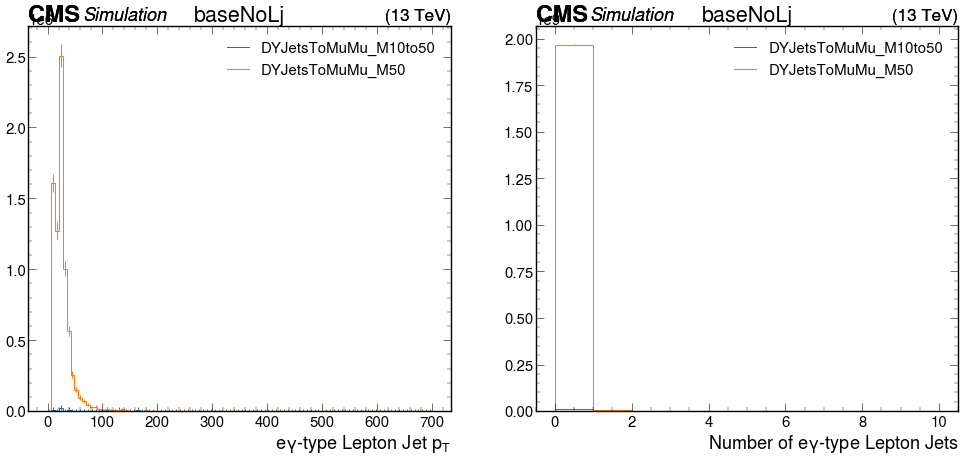

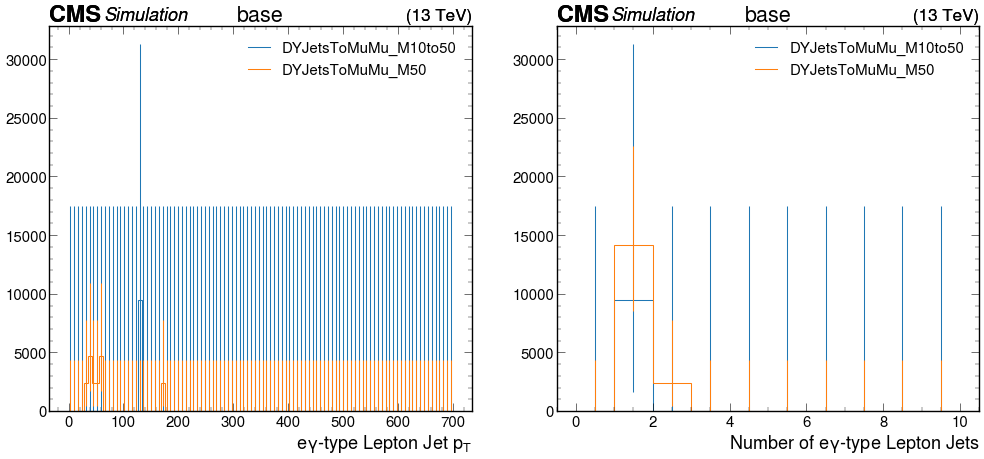

In [16]:
histograms_list = ["egm_lj_pt", "egm_lj_n",]
plot_histograms(samples, histograms_list, "baseNoLj", 2)

plot_histograms(samples, histograms_list, "base", 2)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


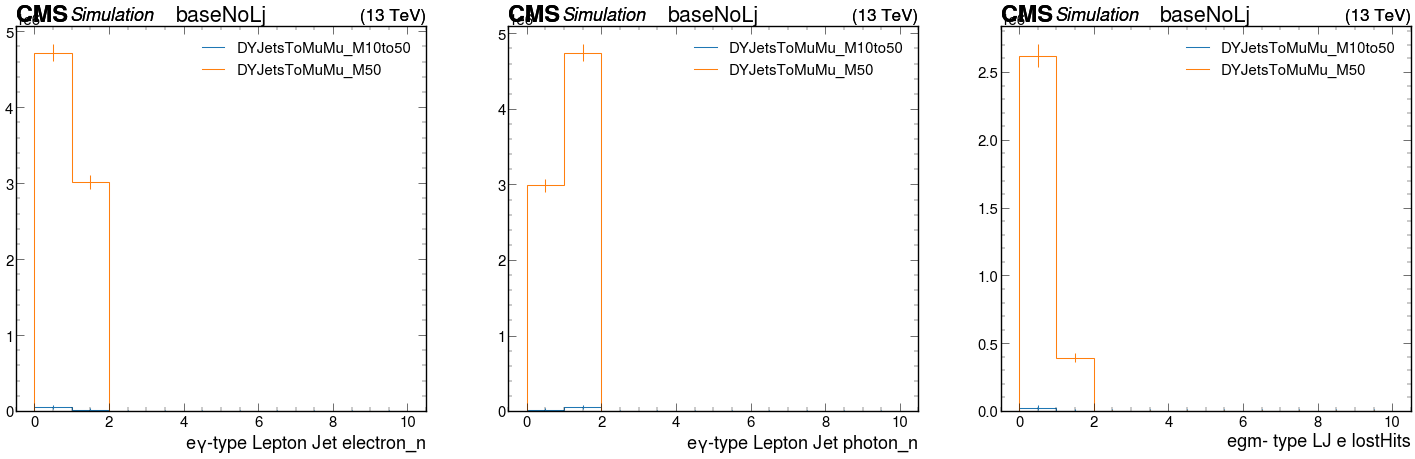

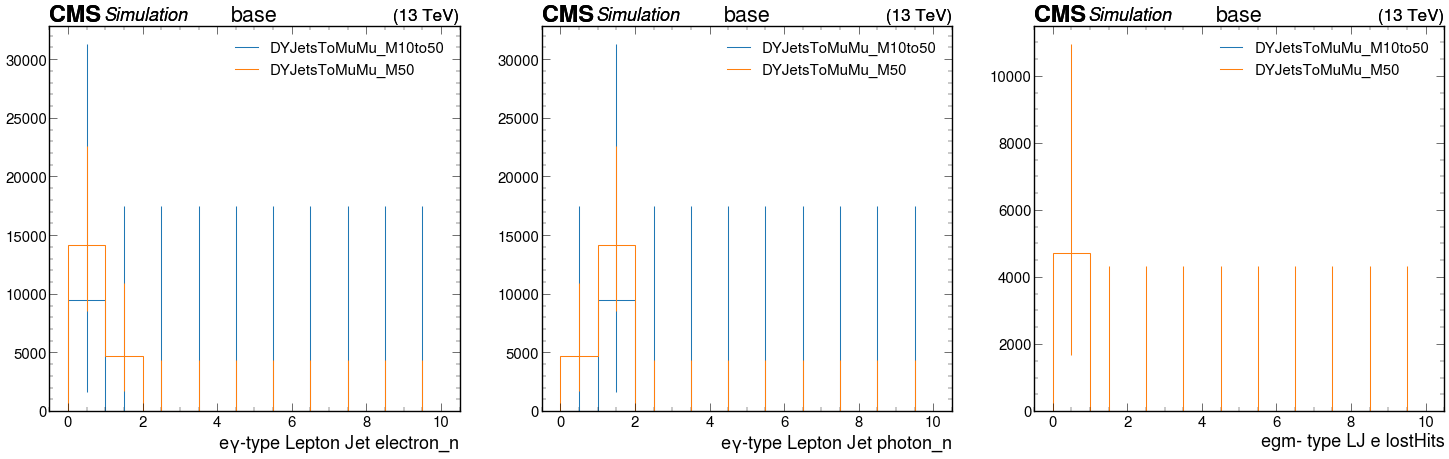

In [18]:
histograms_list = [ "egm_lj_electronN", "egm_lj_photonN", "egm_lj_electron_lostHits"]
plot_histograms(samples, histograms_list, "baseNoLj", 3,)

plot_histograms(samples, histograms_list, "base", 3)


/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale

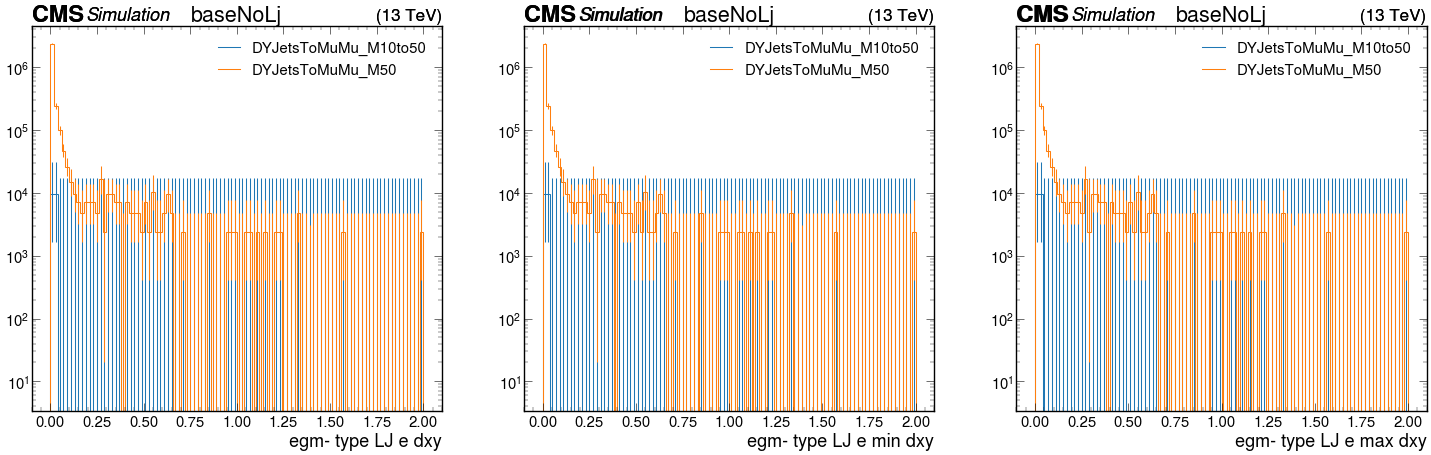

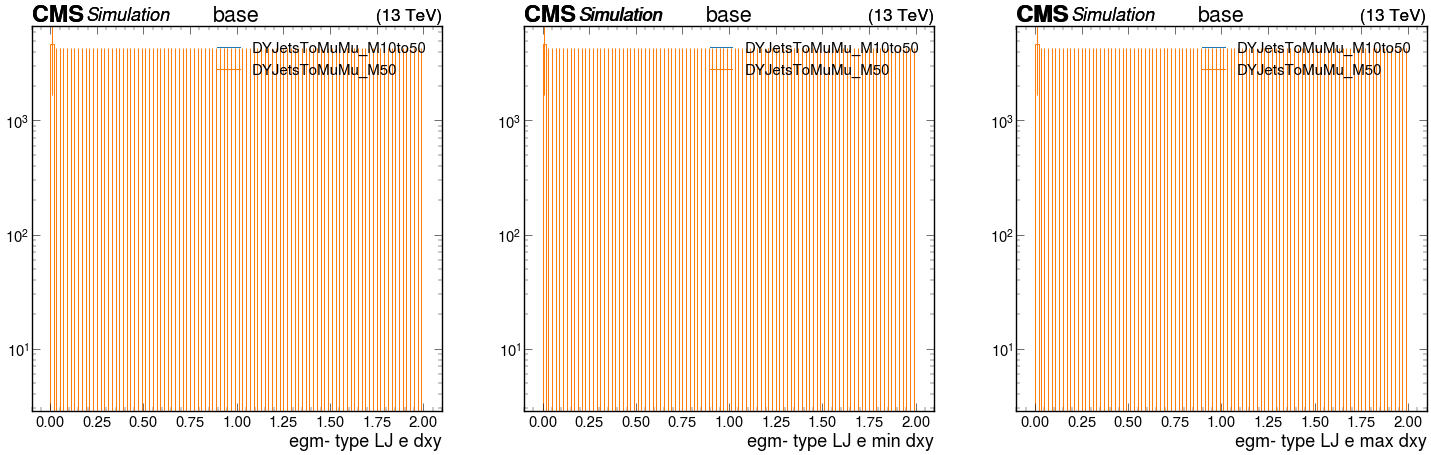

In [8]:
histograms_list = [  "egm_lj_electron_dxy", "egm_lj_electron_min_dxy","egm_lj_electron_max_dxy",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")
plot_histograms(samples, histograms_list, "base", 3, log=True)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale

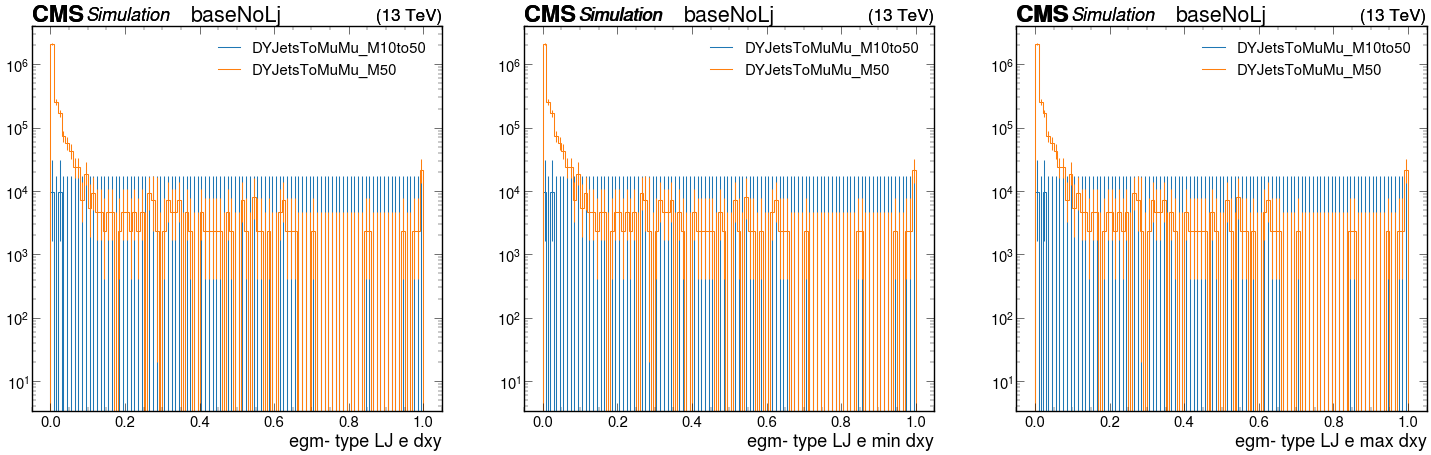

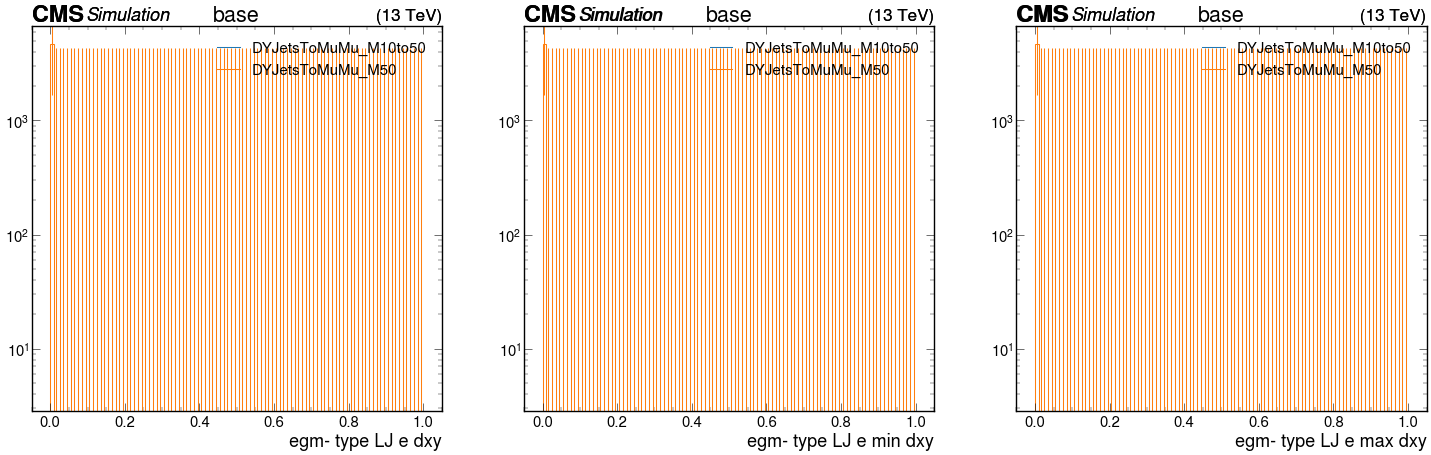

In [9]:
histograms_list = [  "egm_lj_electron_dxy_lowRange", "egm_lj_electron_min_dxy_lowRange","egm_lj_electron_max_dxy_lowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")
plot_histograms(samples, histograms_list, "base", 3, log=True)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/ipykernel_13889/2517662087.py:20: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale

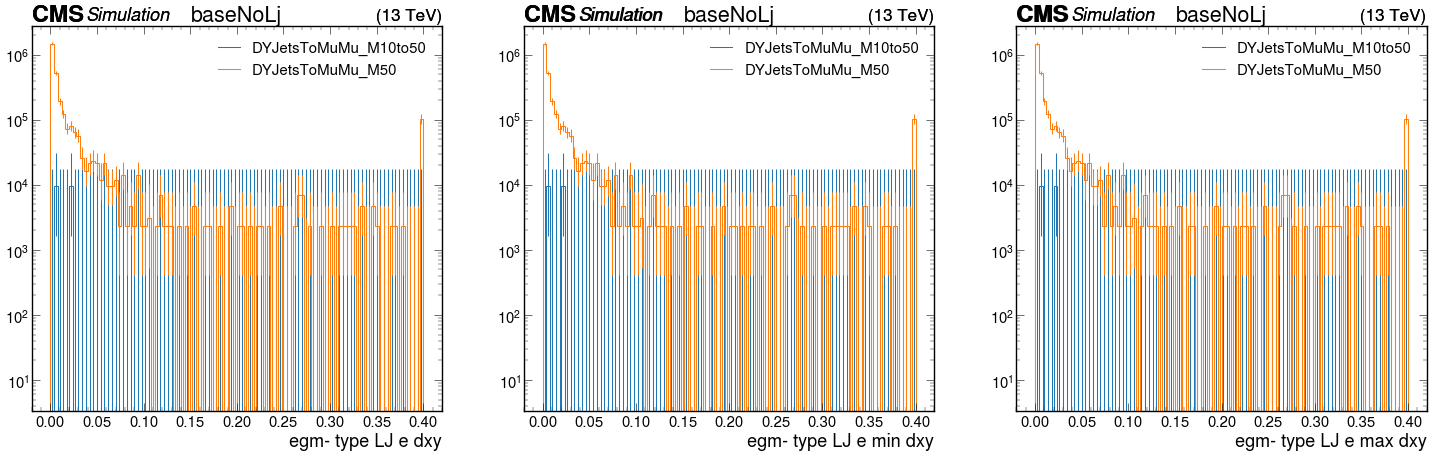

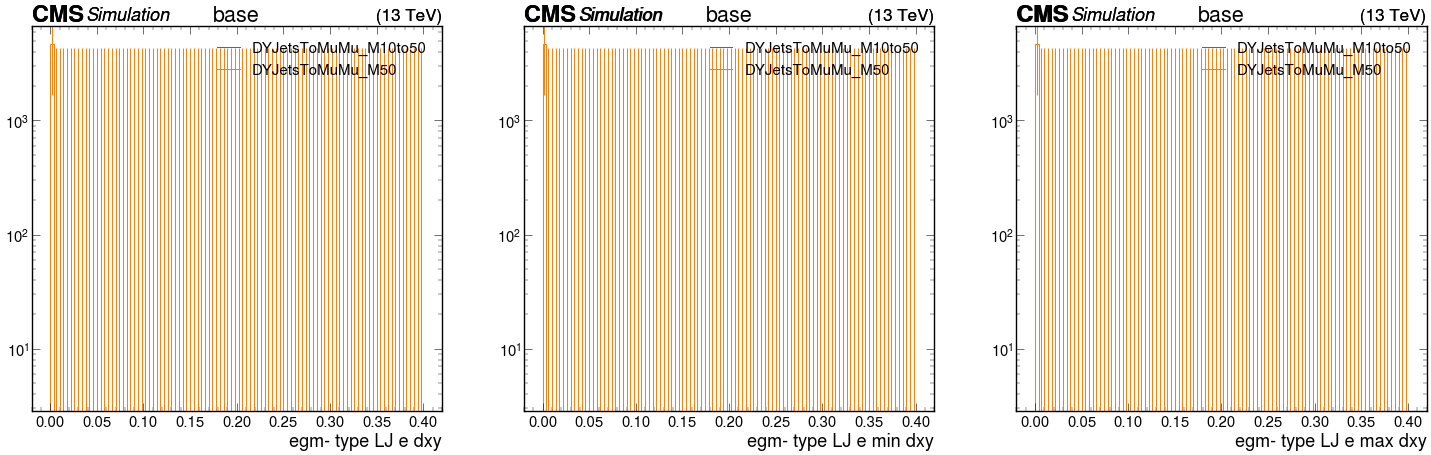

In [10]:
histograms_list = [  "egm_lj_electron_dxy_XLowRange", "egm_lj_electron_min_dxy_XLowRange","egm_lj_electron_max_dxy_XLowRange",]
plot_histograms(samples, histograms_list, "baseNoLj", 3, log=True)
plot_histograms(samples, histograms_list, "base", 3, log=True)

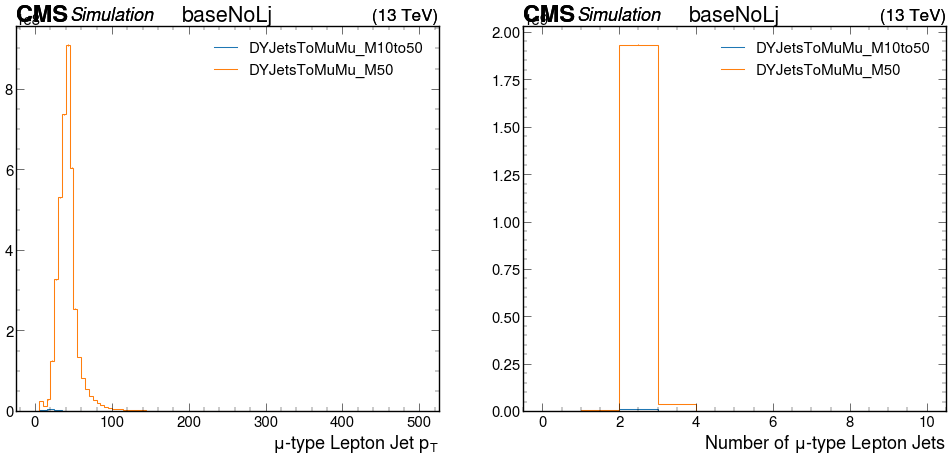

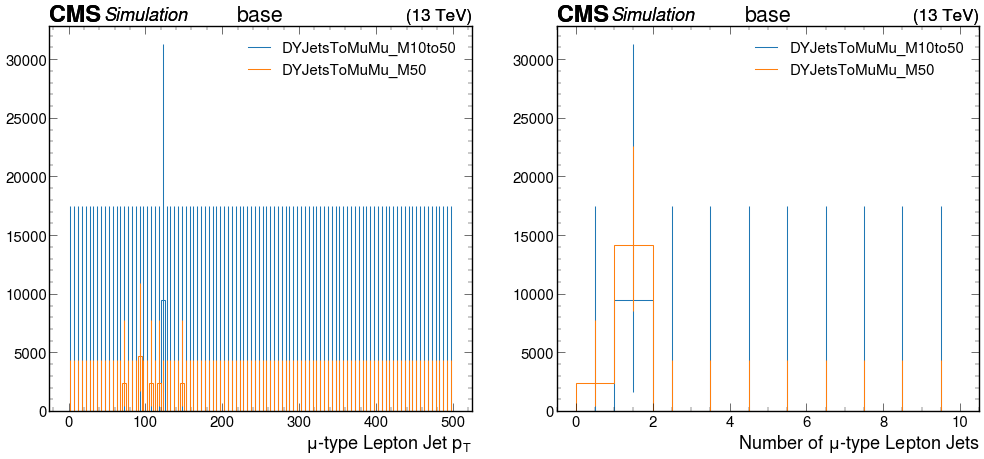

In [11]:
histograms_list = ["mu_lj_pt", "mu_lj_n",]
plot_histograms(samples, histograms_list, "baseNoLj", 2)
plot_histograms(samples, histograms_list, "base", 2)

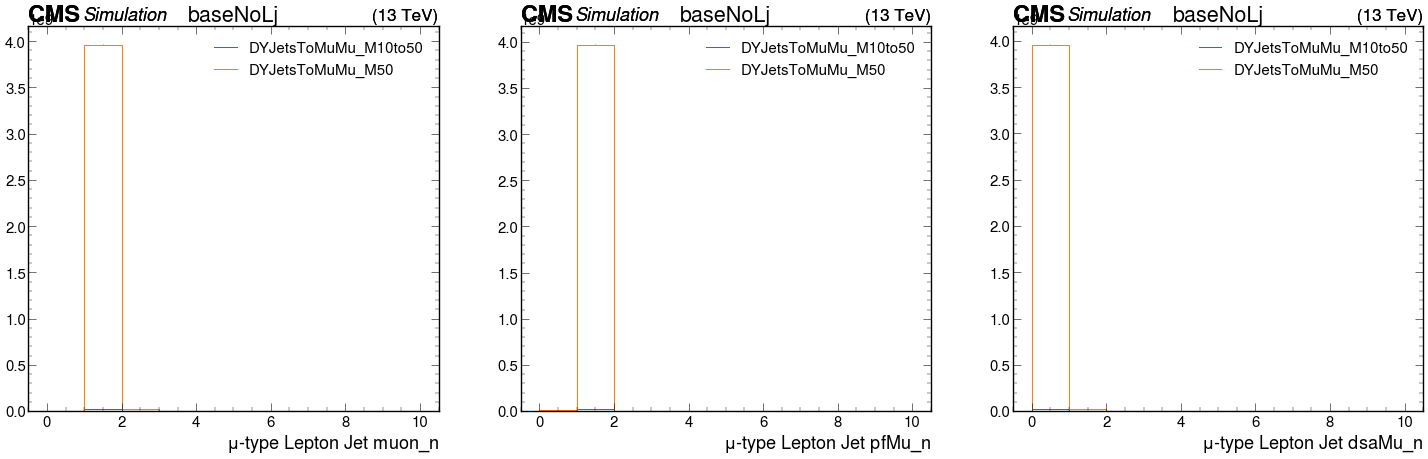

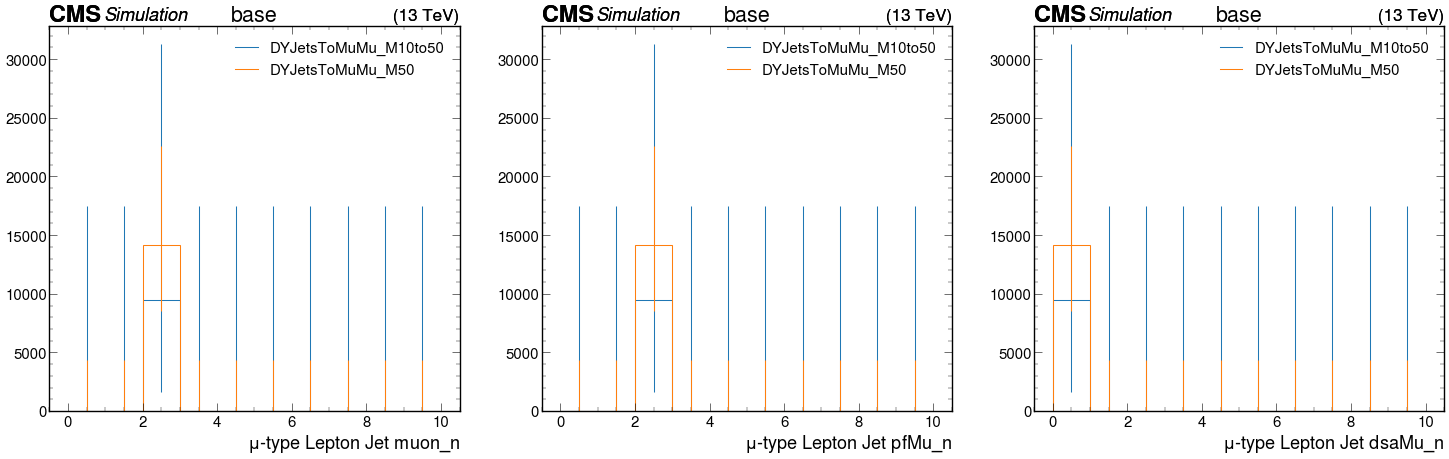

In [12]:
histograms_list = [ "mu_lj_muonN", "mu_lj_pfMu_n", "mu_lj_dsaMu_n",]
plot_histograms(samples, histograms_list, "baseNoLj", 3,)
plot_histograms(samples, histograms_list, "base", 3,)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


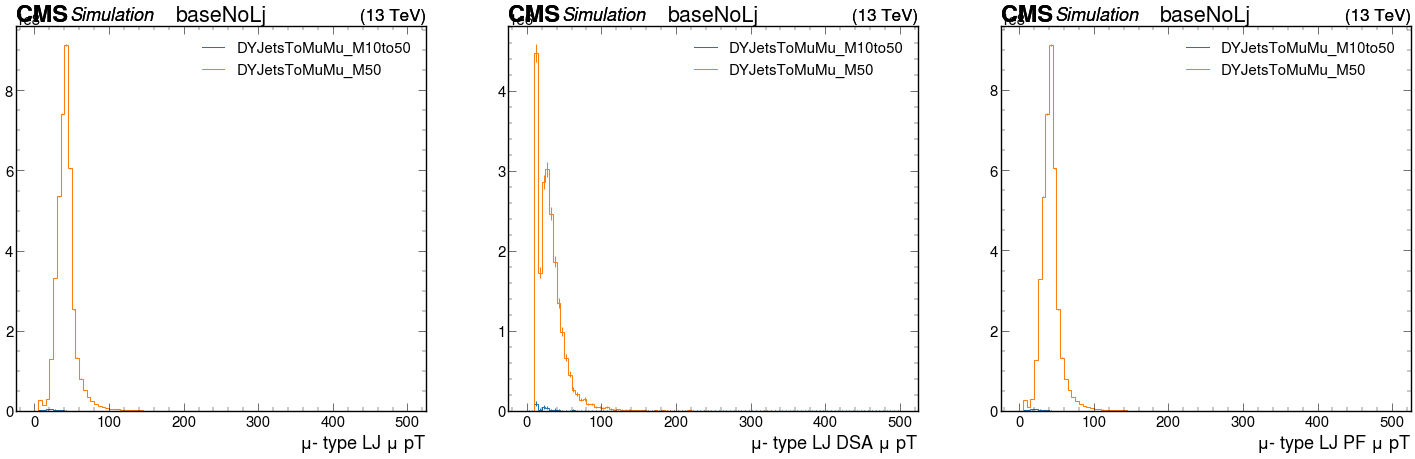

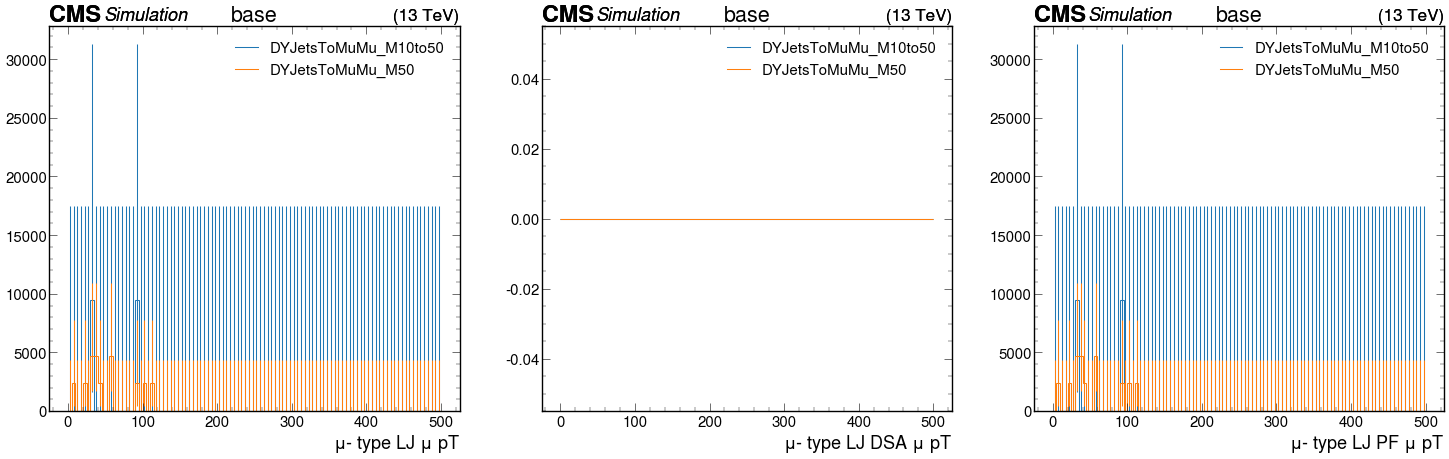

In [13]:
histograms_list = [  "mu_lj_muon_pt", "mu_lj_dsaMuon_pt","mu_lj_pfMuon_pt",]
plot_histograms(samples, histograms_list, "baseNoLj", 3,)
#plot_histograms(samples2, histograms_list, "base_ljObjCut")
plot_histograms(samples, histograms_list, "base", 3,)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


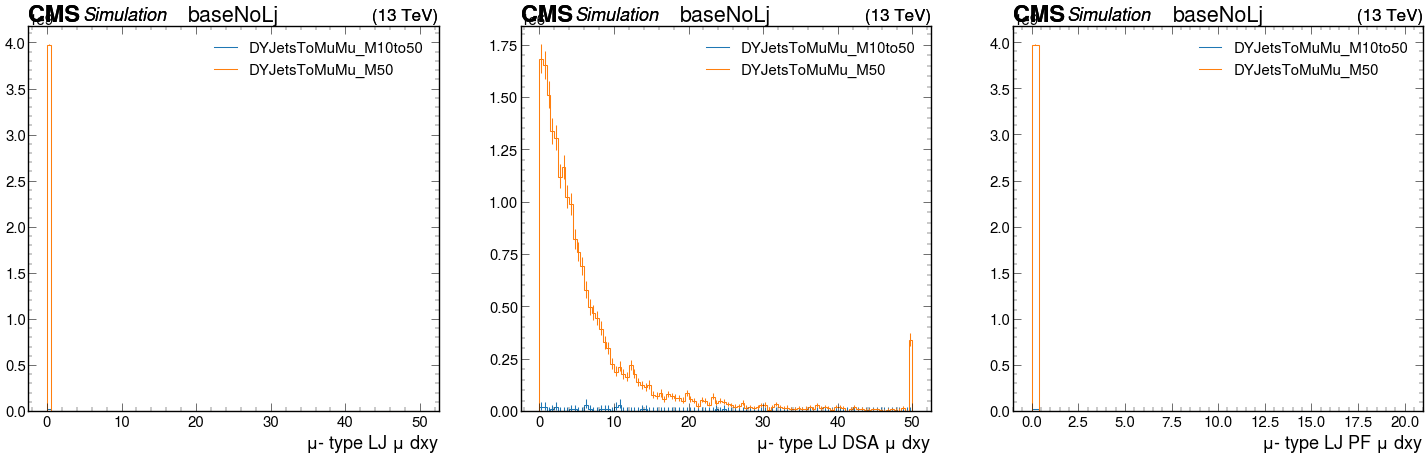

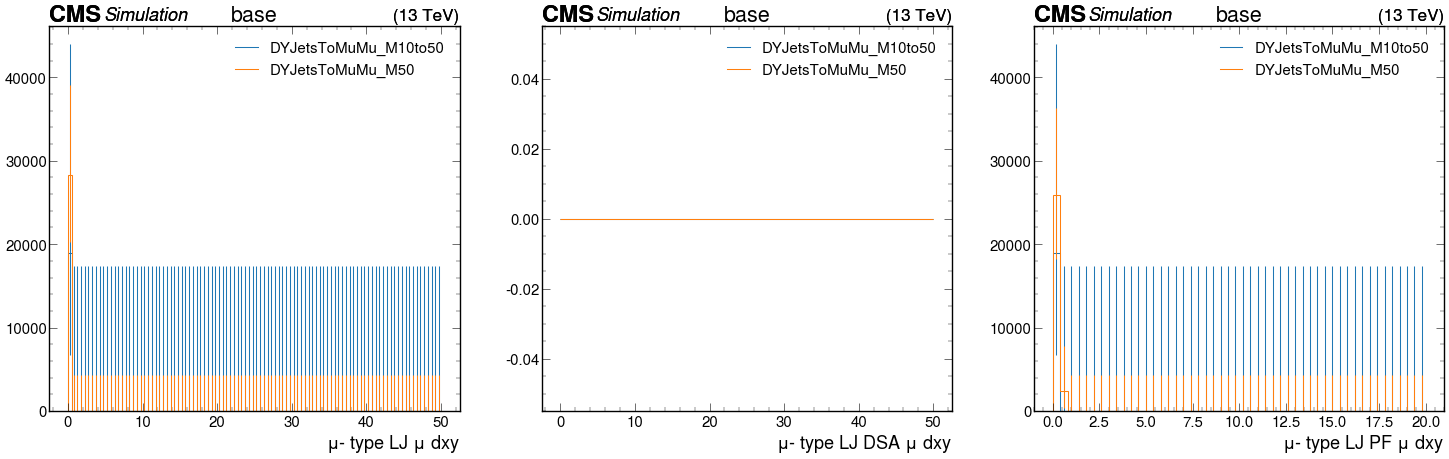

In [14]:
histograms_list = [  "mu_lj_muon_dxy", "mu_lj_dsaMuon_dxy","mu_lj_pfMuon_dxy",]
plot_histograms(samples, histograms_list, "baseNoLj", 3)
plot_histograms(samples, histograms_list, "base", 3)
#plot_histograms(samples2, histograms_list, "base_ljObjCut